In [1]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Selection and Evaluation
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    RandomizedSearchCV, 
    GridSearchCV
)

# Metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    accuracy_score,
    f1_score,
    roc_curve,          
    roc_auc_score        
)

In [2]:
df = pd.read_csv("heart.csv")
df.shape

(1025, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

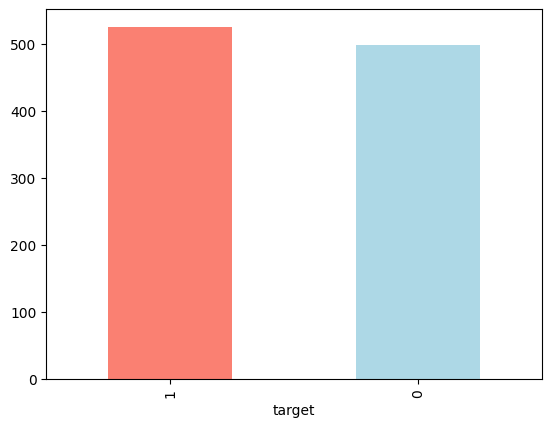

In [5]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

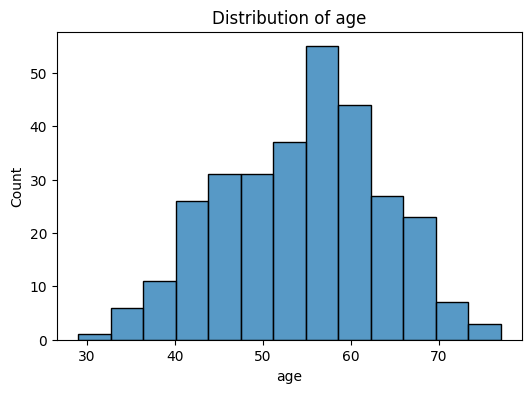

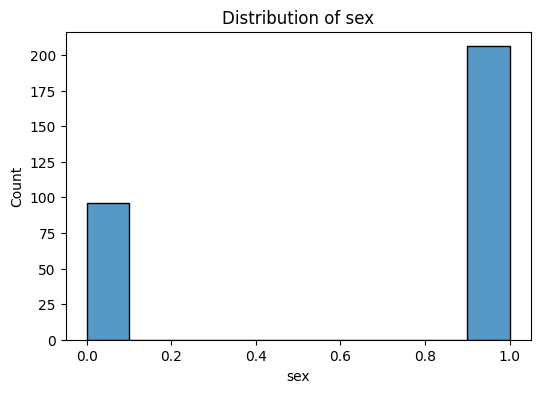

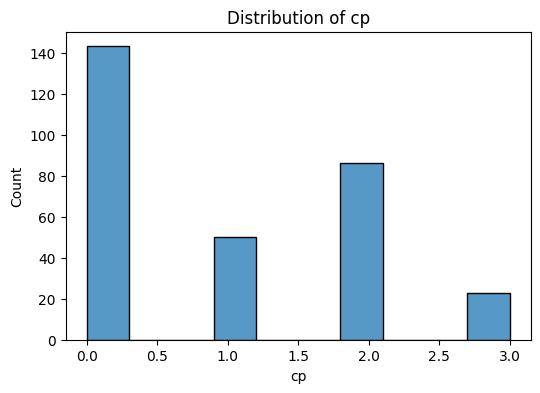

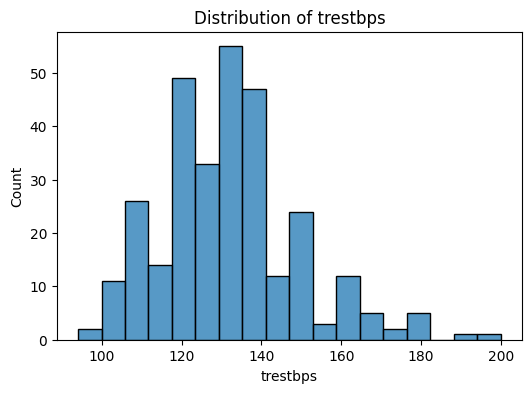

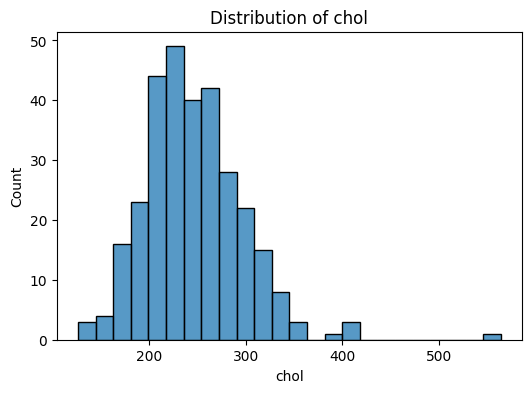

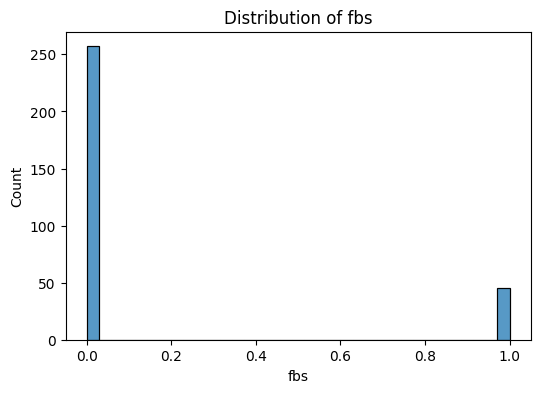

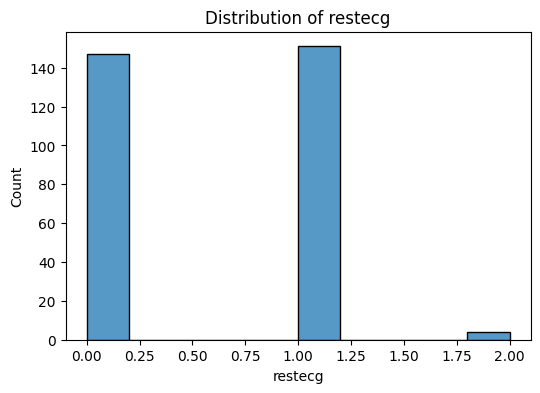

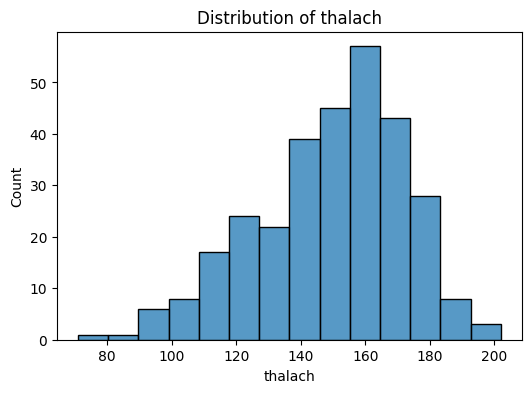

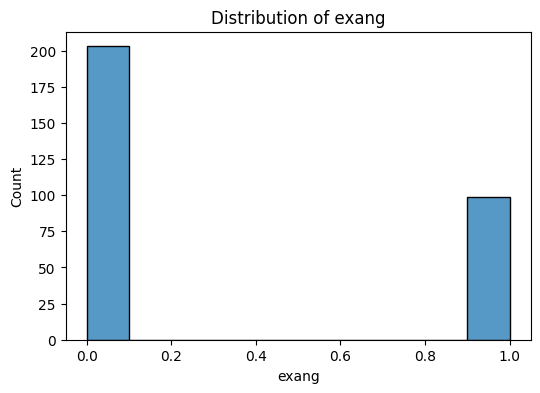

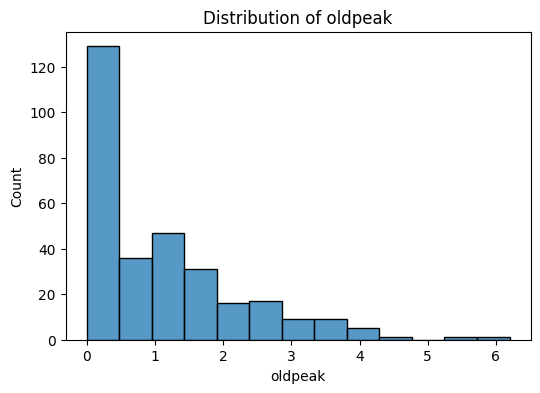

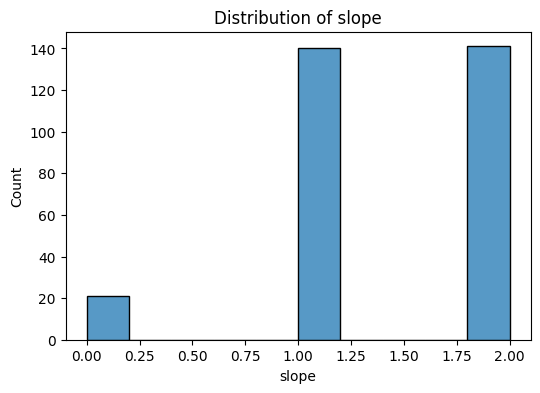

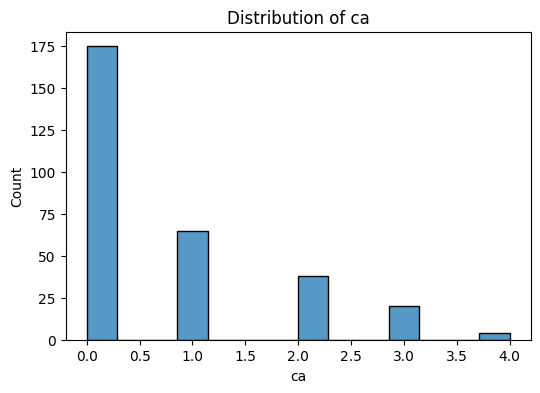

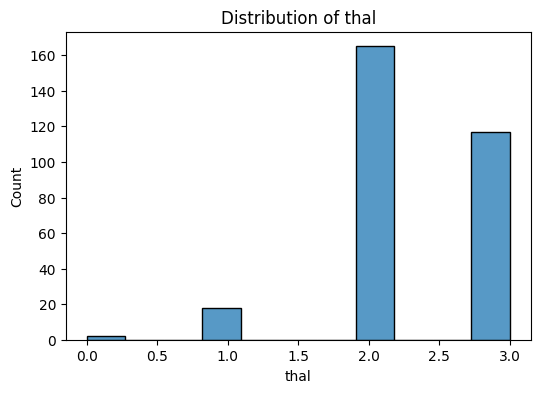

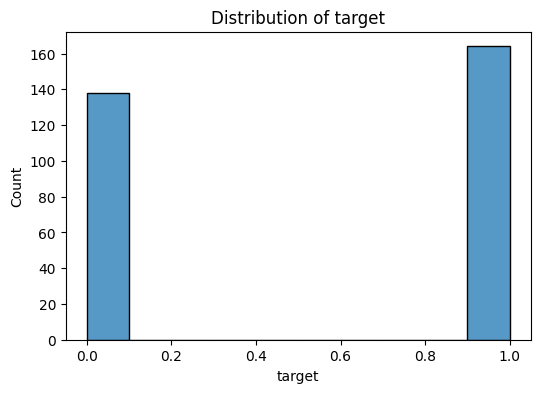

In [9]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [10]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

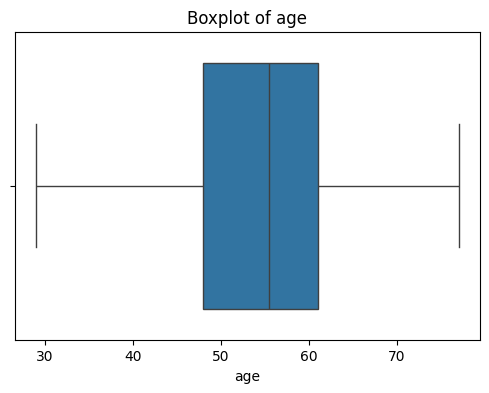

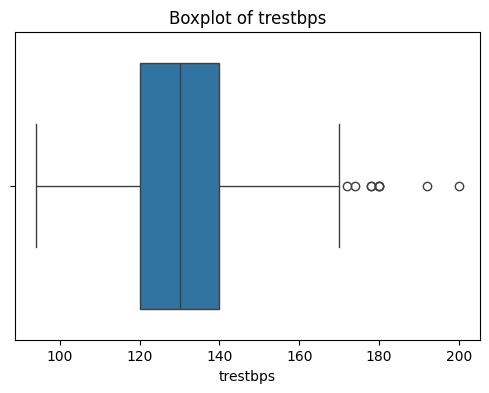

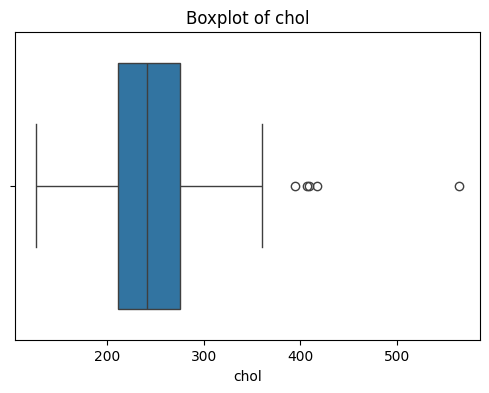

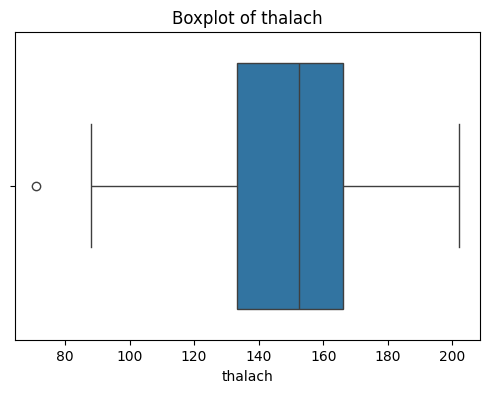

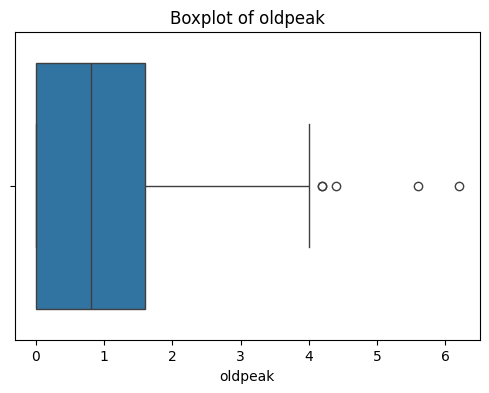

In [11]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
def handle_outliers_iqr(df, cols, method='capping'):
    df_out = df.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        if method == 'trim':
            df_out = df_out[(df_out[col] >= lower) & (df_out[col] <= upper)]
        elif method == 'capping':
            df_out[col] = np.where(df_out[col] < lower, lower,
                                   np.where(df_out[col] > upper, upper, df_out[col]))
    return df_out

In [14]:
df[num_cols]= handle_outliers_iqr(df[num_cols], num_cols, method='capping')

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.258278,245.377070,0.149007,0.526490,149.612997,0.327815,1.027815,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,16.605232,47.486683,0.356686,0.526027,22.765983,0.470196,1.110395,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,370.375000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 35.4 KB


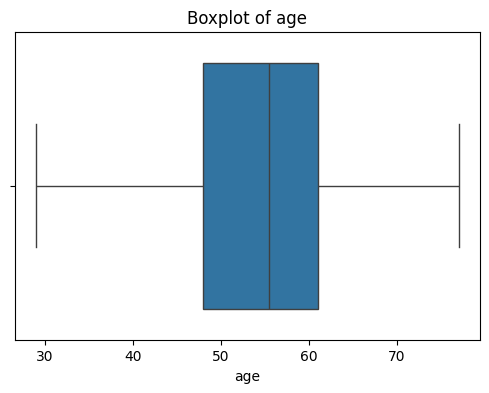

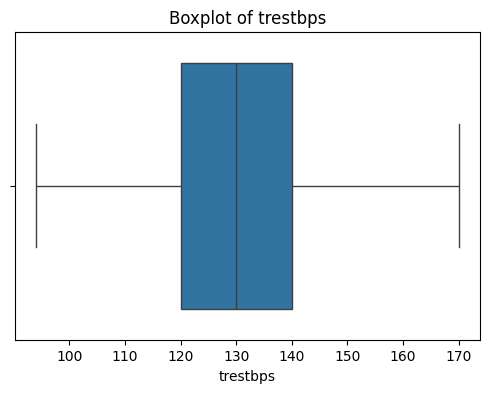

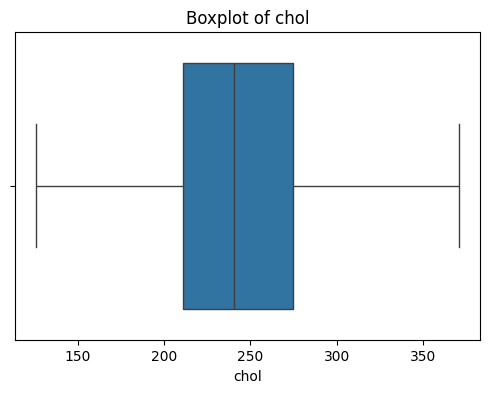

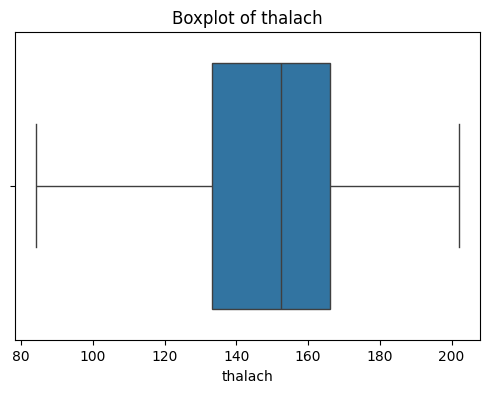

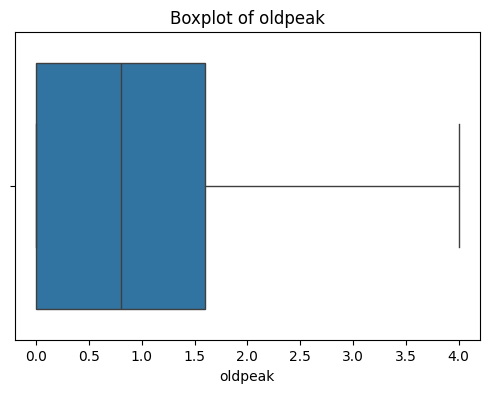

In [18]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#Exploratory data analysis or EDA

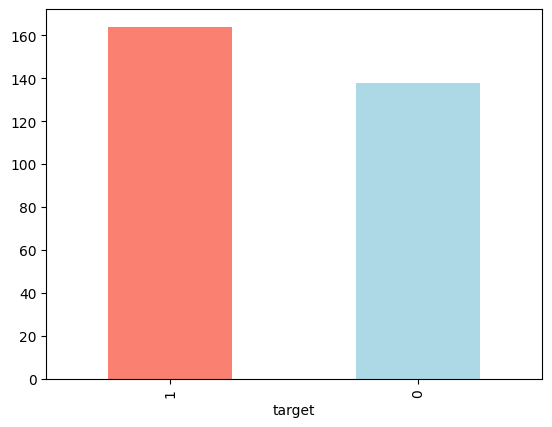

In [19]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show()

### Let's compare our target column with the sex column.

In [20]:
df.sex.value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [21]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,92


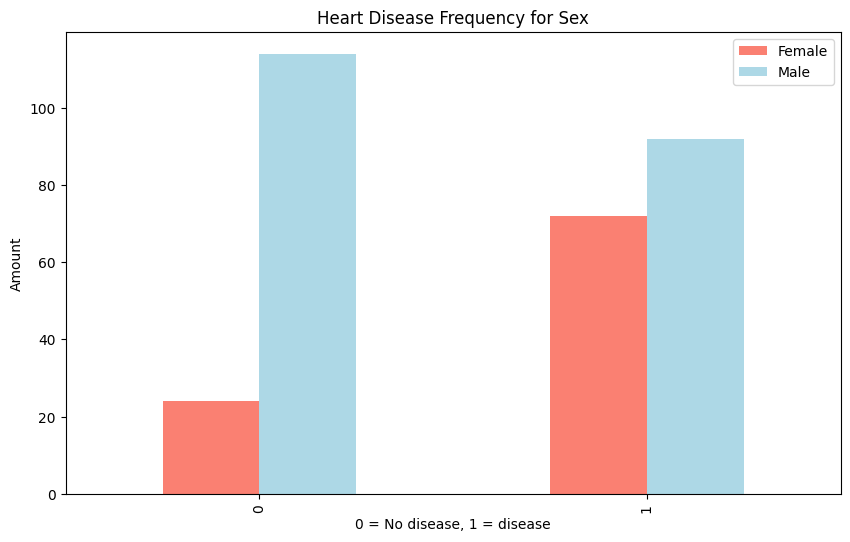

In [22]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.show()

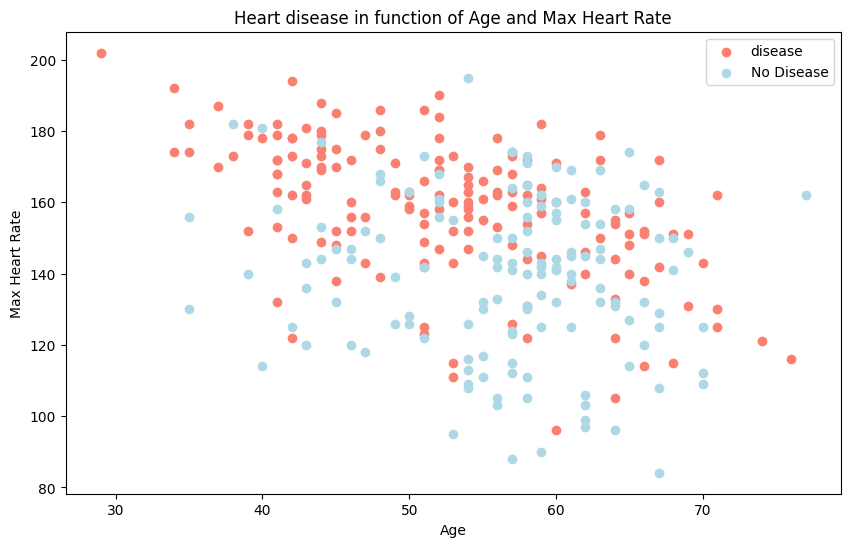

In [23]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with possitive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="lightblue")

# Add some helpful info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["disease", "No Disease"])
plt.show()

In [24]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


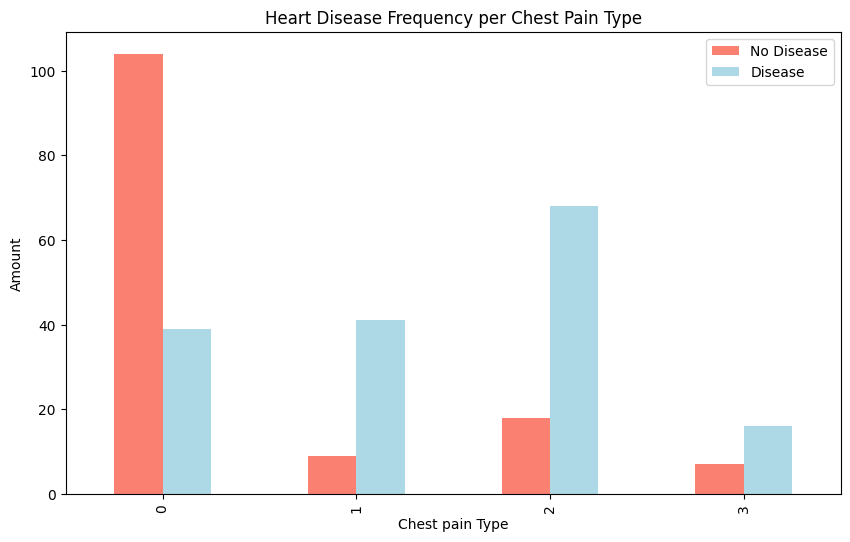

In [25]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.show()

### Correlation between independent variables

In [26]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.290209,0.198901,0.119492,-0.111590,-0.394960,0.093216,0.209143,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.048559,-0.178446,0.046022,-0.060351,-0.045414,0.143460,0.107575,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.055026,-0.089633,0.096018,0.041561,0.293351,-0.392937,-0.142327,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.290209,-0.048559,0.055026,1.000000,0.135429,0.169049,-0.117933,-0.055130,0.056350,0.182151,-0.115248,0.100350,0.051065,-0.140083
chol,0.198901,-0.178446,-0.089633,0.135429,1.000000,0.013221,-0.137117,-0.014519,0.080653,0.053210,0.010459,0.095374,0.086998,-0.099932
fbs,0.119492,0.046022,0.096018,0.169049,0.013221,1.000000,-0.083081,-0.008013,0.024729,0.010471,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.117933,-0.137117,-0.083081,1.000000,0.043183,-0.068807,-0.059850,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.394960,-0.045414,0.293351,-0.055130,-0.014519,-0.008013,0.043183,1.000000,-0.381027,-0.349367,0.385844,-0.231057,-0.096466,0.420408
exang,0.093216,0.143460,-0.392937,0.056350,0.080653,0.024729,-0.068807,-0.381027,1.000000,0.298094,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.209143,0.107575,-0.142327,0.182151,0.053210,0.010471,-0.059850,-0.349367,0.298094,1.000000,-0.572578,0.232297,0.207221,-0.435099


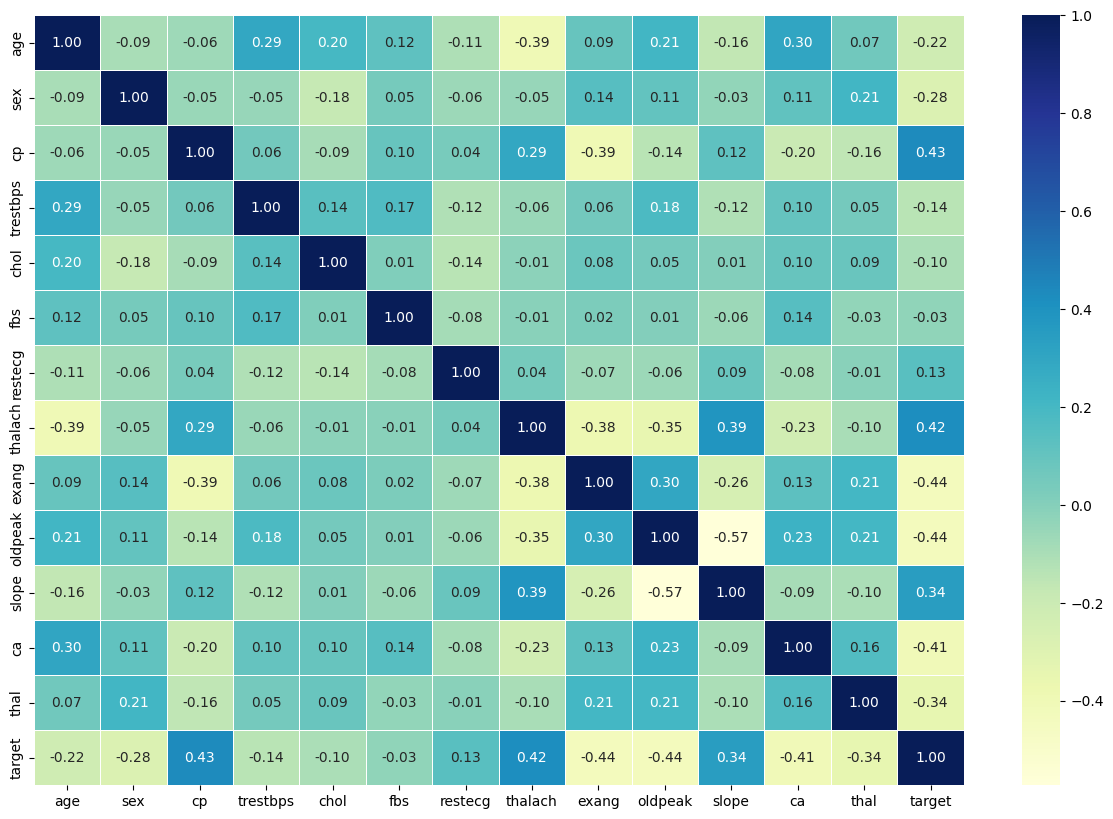

In [27]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
plt.show()

### MODELING

In [28]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df["target"]

In [29]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.0,0,2,120.0,211.0,0,0,115.0,0,1.5,1,0,2
733,44.0,0,2,108.0,141.0,0,1,175.0,0,0.6,1,0,2
739,52.0,1,0,128.0,255.0,0,1,161.0,1,0.0,2,1,3
843,59.0,1,3,160.0,273.0,0,0,125.0,0,0.0,2,0,2


In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
53,49.0,1,2,120.0,188.0,0,1,139.0,0,2.0,1,3,3
19,58.0,1,2,140.0,211.0,1,0,165.0,0,0.0,2,0,2
67,42.0,1,0,136.0,315.0,0,1,125.0,1,1.8,1,0,1
321,48.0,0,2,130.0,275.0,0,1,139.0,0,0.2,2,0,2
194,67.0,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3,2


In [33]:
np.array(y_train), len(y_train)

(array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1]),
 241)

In [34]:
np.array(y_test), len(y_test)

(array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]),
 61)

In [35]:
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        model_scores[name] = acc
    return model_scores

In [36]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5737704918032787,
 'Logistic Regression': 0.7868852459016393,
 'Random Forest': 0.7704918032786885}

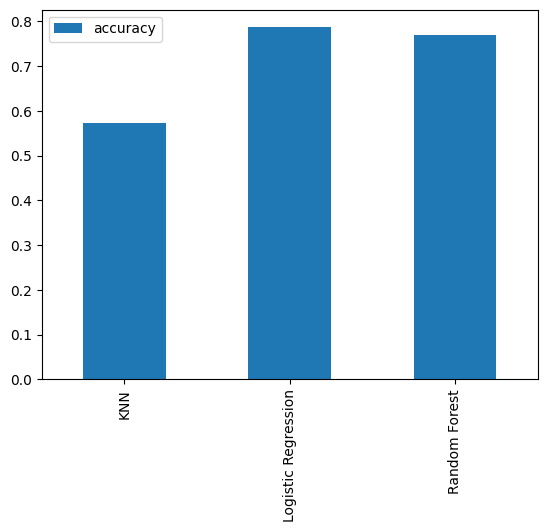

In [37]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### KNN

In [38]:
from sklearn.metrics import accuracy_score

train_scores = []
test_scores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

In [39]:
train_scores

[1.0,
 0.8008298755186722,
 0.8215767634854771,
 0.7593360995850622,
 0.7800829875518672,
 0.7717842323651453,
 0.7759336099585062,
 0.7510373443983402,
 0.7551867219917012,
 0.7468879668049793,
 0.7427385892116183,
 0.7261410788381742,
 0.7012448132780082,
 0.6929460580912863,
 0.6970954356846473,
 0.6929460580912863,
 0.6887966804979253,
 0.6929460580912863,
 0.7012448132780082,
 0.7136929460580913]

In [40]:
test_scores

[0.5245901639344263,
 0.4426229508196721,
 0.5573770491803278,
 0.5573770491803278,
 0.5737704918032787,
 0.6229508196721312,
 0.5737704918032787,
 0.5573770491803278,
 0.5573770491803278,
 0.5409836065573771,
 0.5409836065573771,
 0.6065573770491803,
 0.5573770491803278,
 0.6065573770491803,
 0.5409836065573771,
 0.5901639344262295,
 0.5573770491803278,
 0.5737704918032787,
 0.6065573770491803,
 0.6065573770491803]

Maximum KNN score on the test data: 62.30%


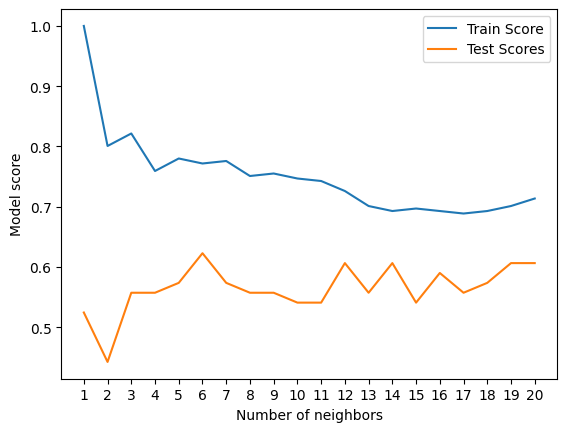

In [41]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

##### Looking at the graph, n_neighbors =7 seems best.

### Tuning models with with RandomizedSearchCV

In [42]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = { "n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [43]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.615848211066026)}

In [45]:
rs_log_reg.score(X_test, y_test)

0.7704918032786885

In [46]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [47]:
rs_rf.best_params_

{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(11),
 'max_depth': 3}

In [48]:
rs_rf.score(X_test, y_test)

0.7540983606557377

### Tuning a model with GridSearchCV

In [49]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [50]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.38566204211634725), 'solver': 'liblinear'}

In [51]:
gs_log_reg.score(X_test, y_test)

0.7704918032786885

In [52]:
from sklearn.metrics import RocCurveDisplay

In [53]:
y_preds = rs_rf.predict(X_test)

In [54]:
y_preds

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [55]:
np.array(y_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

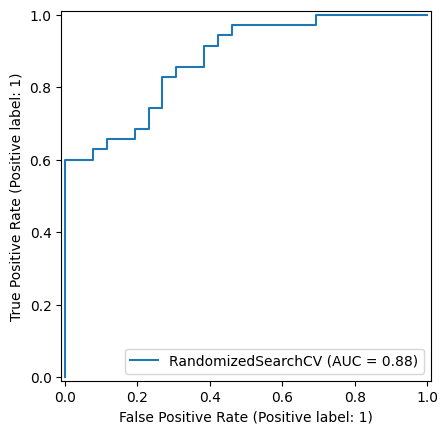

In [56]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test)
plt.show()

### CLASSIFICATION REPORT

In [57]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68        26
           1       0.75      0.86      0.80        35

    accuracy                           0.75        61
   macro avg       0.76      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



In [58]:
rs_rf.best_params_

{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(11),
 'max_depth': 3}

In [59]:
clf = RandomForestClassifier(n_estimators=160,
 min_samples_split= 4,
 min_samples_leaf=7,
 max_depth= None)

In [60]:
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.85245902, 0.83606557, 0.91666667, 0.78333333, 0.75      ])

In [61]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8277049180327868)

In [62]:
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8341892163563991)

In [63]:
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.8967803030303031)

In [64]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8600128210488176)

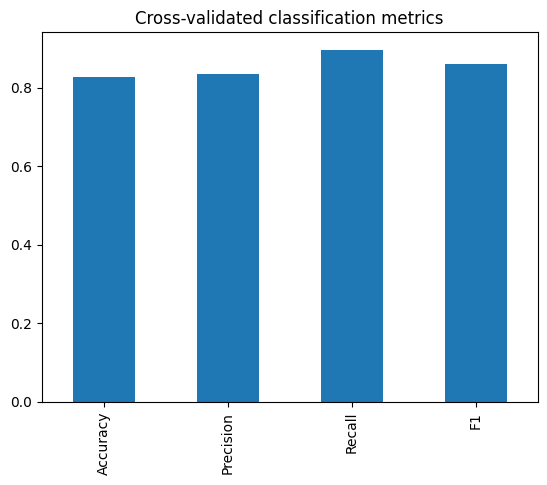

In [65]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False);

### Feature Importances

In [66]:
clf.fit(X_train, y_train)
clf.feature_importances_

array([0.05573588, 0.03892253, 0.17173955, 0.0199697 , 0.03323169,
       0.00151849, 0.00536726, 0.1209969 , 0.08269713, 0.11117156,
       0.06900202, 0.17071124, 0.11893605])

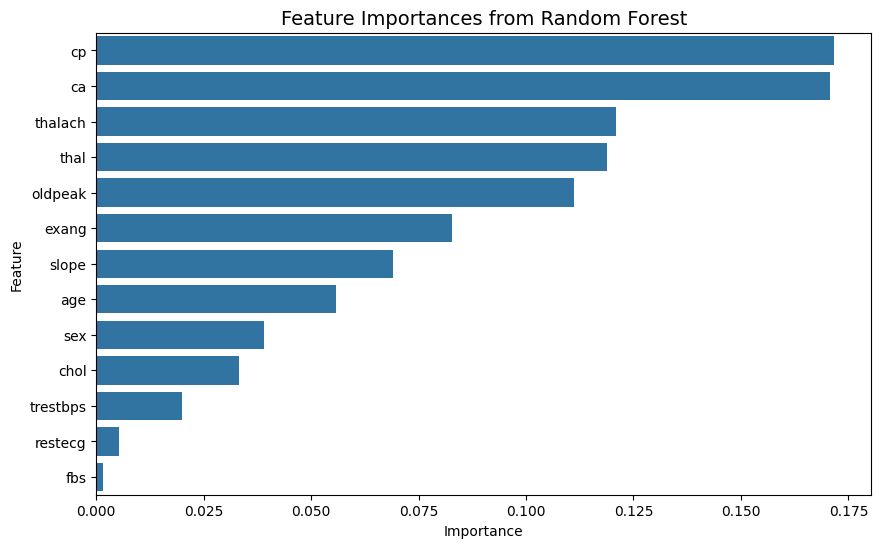

In [67]:
feature_importance = pd.Series(clf.feature_importances_, index=X_train.columns)

# Sort in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importances from Random Forest", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()